
## Import DFN data

In [1]:
import hashlib
#md5_hash = hashlib.md5()

# MFCentrepoints_final.txt
root = "C:\\Users\\simold\\Documents\\git\\geoseer\\data\\DFNGEN\\"
fn = "MFCentrepoints_final.txt"


file = root+fn

with open(file) as f:
    #f_data = f.read()
    #file_hash = hashlib.md5(f_data.encode())
    f_data = f.readlines()

#print(file_hash.hexdigest())

hdrs = ['FracNo',
        'Set',
        'IPlusHalfLength',
        'IMinusHalfLength',
        'Number of points',
        'Dip',
        'IPlusTipType',
        'IMinusTipType',
        'IPlusTerminatingFracture',
        'IMinusTerminatingFracture',
        'Nucleation time (ma)'
        ]

start_rec = "Start Points"
end_rec = "End Points"


print(f_data)

['FracNo\tSet\tIPlusHalfLength\tIMinusHalfLength\tNumber of points\tDip\tIPlusTipType\tIMinusTipType\tIPlusTerminatingFracture\tIMinusTerminatingFracture\tNucleation time (ma)\t\n', '2\tHMin\t15.4504880753581\t4.54951192464191\t4\t1.01722196789785\tOutOfBounds\tOutOfBounds\t0\t0\t0.143460104322922\t\n', 'Start Points\n', '-4.05685508126982E-18\t11.6253526050715\t2003\t\n', '4.54951192464191\t11.6253526050715\t2003\t\n', '10\t11.6253526050715\t2003\t\n', '20\t11.6253526050715\t2003\t\n', 'End Points\n', '3\tHMin\t1.00195544818507\t18.9980445518149\t4\t1.01722196789785\tOutOfBounds\tOutOfBounds\t0\t0\t0.143623295774694\t\n', 'Start Points\n', '4.22819430501985E-18\t3.55732942165682\t2003\t\n', '10\t3.55732942165682\t2003\t\n', '18.9980445518149\t3.55732942165683\t2003\t\n', '20\t3.55732942165683\t2003\t\n', 'End Points\n', '4\tHMin\t5.53395193327868\t14.4660480667213\t4\t1.01722196789785\tOutOfBounds\tOutOfBounds\t0\t0\t0.143668673080659\t\n', 'Start Points\n', '-1.87824992665333E-17\t18

In [2]:
print(len(f_data))

fxls = []

for line in f_data:
    line = line.strip().split('\t')
    fxls.append(line)



53


In [3]:
hdr = fxls[0]

fx_db = []

print(hdr)

['FracNo', 'Set', 'IPlusHalfLength', 'IMinusHalfLength', 'Number of points', 'Dip', 'IPlusTipType', 'IMinusTipType', 'IPlusTerminatingFracture', 'IMinusTerminatingFracture', 'Nucleation time (ma)']


Bring in individual fracture records and develop a database.

In [4]:
#import hashlib
import numpy as np


def read_datafile(file):
    """
    Open and read data from a tab-deliminated ascii file, strip and split on line endings and tabs.
    Return list of lines.
    :param file:
    :return:
    """
    with open(file) as f:
    #f_data = f.read()
        #file_hash = hashlib.md5(f.encode())
        file_data = f.readlines()

    # import file lines
    read_data = []

    for line in file_data:
        line = line.strip().split('\t')
        read_data.append(line)
    return read_data

def import_macrofractures(file, fx_rep='centreline'):
    """
    Function to import fracture data from output from the DFN Generator in either centreline or polygon format
    :return: database of fractures
    """
    read_data = read_datafile(file)

    # build dataset
    hdr = read_data[0]
    len_hdr = len(hdr)

    fracture_db = dict()
    fracture_counter = 0

    for line in read_data[1:]:
        if len(line) == len_hdr:
            fracture_db[fracture_counter] = dict()
            for hdr_col in range(len(hdr)):
                fracture_db[fracture_counter][hdr[hdr_col]] = line[hdr_col]
            fracture_db[fracture_counter]['Coords'] = []
            fracture_counter += 1
        elif line == ['Start Points'] or line == ['End Points'] :
            pass
        else:
            fracture_db[fracture_counter-1]['Coords'].append(line)
            #fracture_db[fracture_counter]['Coords'] = line

    # TODO: Manage data types
    for key in fracture_db.keys():
        fracture_db[key]['FracNo'] = int(fracture_db[key]['FracNo'])
        fracture_db[key]['IPlusHalfLength'] = np.float64(fracture_db[key]['IPlusHalfLength'])
        fracture_db[key]['IMinusHalfLength'] = np.float64(fracture_db[key]['IMinusHalfLength'])
        fracture_db[key]['Number of points'] = int(fracture_db[key]['Number of points'])
        fracture_db[key]['Dip'] = np.float64(fracture_db[key]['Dip'])
        fracture_db[key]['IPlusTerminatingFracture'] = int(fracture_db[key]['IPlusTerminatingFracture'])
        fracture_db[key]['IMinusTerminatingFracture'] = int(fracture_db[key]['IMinusTerminatingFracture'])
        fracture_db[key]['Nucleation time (ma)'] = np.float64(fracture_db[key]['Nucleation time (ma)'])
        fracture_db[key]['Coords'] = np.asarray(fracture_db[key]['Coords'], dtype=np.float64)

    return fracture_db

fracture_db = import_macrofractures(file, fx_rep='centreline')

fracture_db

{0: {'FracNo': 2,
  'Set': 'HMin',
  'IPlusHalfLength': 15.4504880753581,
  'IMinusHalfLength': 4.54951192464191,
  'Number of points': 4,
  'Dip': 1.01722196789785,
  'IPlusTipType': 'OutOfBounds',
  'IMinusTipType': 'OutOfBounds',
  'IPlusTerminatingFracture': 0,
  'IMinusTerminatingFracture': 0,
  'Nucleation time (ma)': 0.143460104322922,
  'Coords': array([[-4.05685508e-18,  1.16253526e+01,  2.00300000e+03],
         [ 4.54951192e+00,  1.16253526e+01,  2.00300000e+03],
         [ 1.00000000e+01,  1.16253526e+01,  2.00300000e+03],
         [ 2.00000000e+01,  1.16253526e+01,  2.00300000e+03]])},
 1: {'FracNo': 3,
  'Set': 'HMin',
  'IPlusHalfLength': 1.00195544818507,
  'IMinusHalfLength': 18.9980445518149,
  'Number of points': 4,
  'Dip': 1.01722196789785,
  'IPlusTipType': 'OutOfBounds',
  'IMinusTipType': 'OutOfBounds',
  'IPlusTerminatingFracture': 0,
  'IMinusTerminatingFracture': 0,
  'Nucleation time (ma)': 0.143623295774694,
  'Coords': array([[4.22819431e-18, 3.55732942e+0

Data now extracted from file, next step to generate plots of the fracture lines.

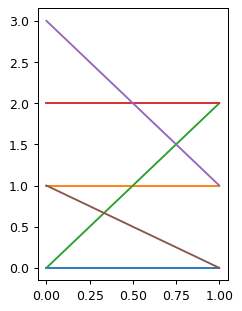

In [5]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString


fig = plt.figure(1, dpi=90)

# 1: simple line
ax = fig.add_subplot(121)
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

ax.plot(line.xy)

plt.show()



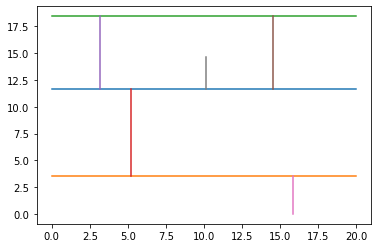

In [6]:
for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    plt.plot(x, y)

plt.show()

In [7]:
for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    print(list(zip(x,y)))

[(-4.05685508126982e-18, 11.6253526050715), (4.54951192464191, 11.6253526050715), (10.0, 11.6253526050715), (20.0, 11.6253526050715)]
[(4.22819430501985e-18, 3.55732942165682), (10.0, 3.55732942165682), (18.9980445518149, 3.55732942165683), (20.0, 3.55732942165683)]
[(-1.87824992665333e-17, 18.4386683993222), (10.0, 18.4386683993222), (14.4660480667213, 18.4386683993222), (20.0, 18.4386683993222)]
[(5.21680651475527, 3.55732942165682), (5.21680651475527, 5.0024216831673), (5.21680651475527, 10.0), (5.21680651475527, 11.6253526050715)]
[(3.17994487154295, 11.6253526050715), (3.17994487154295, 18.0499420166248), (3.17994487154295, 18.4386683993222)]
[(14.5659772514207, 11.6253526050715), (14.5659772514207, 16.8506963489813), (14.5659772514207, 18.4386683993222)]
[(15.847308512706, 0.0), (15.847308512706, 3.50619767955793), (15.847308512706, 3.55732942165682)]
[(10.1210597577137, 11.6253526050715), (10.1210597577137, 13.898462575813), (10.1210597577137, 14.6394245115292)]


Currently location data is stored as coordinates, need to convert this to a unified list of vertices.
Afterwards, then screen vertices for those that are too close to one another.

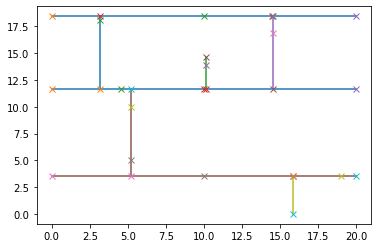

In [11]:

for key in fracture_db.keys():
    x = fracture_db[key]['Coords'][:,0]
    y = fracture_db[key]['Coords'][:,1]
    plt.plot(x, y)
    for pt_i in range(len(x)):
        plt.plot(x[pt_i], y[pt_i], 'x')

plt.show()

Label vertices  by type and with unique reference

In [ ]:
# add labels for the vertices

for key in fracture_db.keys():
    fracture_db[key]['vt_labels']
    fracture_db[key]['Coords']


In [ ]:

class Vertex:
    """

    """
    def __init__(self):
        self.vt_id =
        self.coords =
        self.vt_type =
        self.vt_position = centre